In [18]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
therohk_million_headlines_path = kagglehub.dataset_download('therohk/million-headlines')

print('Data source import complete.')


Data source import complete.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [20]:
data = pd.read_csv("abcnews-date-text.csv", on_bad_lines='skip', usecols=["headline_text"])
data = data.head(50000)
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   headline_text  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [22]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text
9253,5 australian sars cases being monitored
9458,5 australian sars cases being monitored
28316,al jazeera broadcasts saddam tape
28083,al jazeera broadcasts saddam tape
6402,all walks of life follow protest path
6192,all walks of life follow protest path
15880,an early taste of later battles
4597,an early taste of later battles


In [23]:
data = data.drop_duplicates('headline_text')

In [24]:
# Custom punctuation marks
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', "%"]

# Combine English stop words with custom punctuation into a single list
stop_words = list(text.ENGLISH_STOP_WORDS) + punc

# Extract the headline text from the DataFrame and drop NaN values
desc = data['headline_text'].dropna().values

# Create an instance of TfidfVectorizer using the custom stop words list
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Fit and transform the text data into TF-IDF representation
X = vectorizer.fit_transform(desc)

In [25]:
word_features = vectorizer.get_feature_names_out()  # Use get_feature_names_out() instead
print(len(word_features))
print(word_features[5000:5100])  # Print features from index 5000 to 5100

20925
['customs' 'cut' 'cutbacks' 'cuthbert' 'cuts' 'cutting' 'cuttlefish' 'cwa'
 'cwealth' 'cweath' 'cyanide' 'cyber' 'cyclassics' 'cycle' 'cycleway'
 'cycling' 'cyclings' 'cyclist' 'cyclists' 'cyclone' 'cylinder'
 'cylinders' 'cynical' 'cypriot' 'cypriots' 'cyprus' 'cyrus' 'cyst'
 'cystic' 'czech' 'czechs' 'da' 'dad' 'daddy' 'dads' 'dafa' 'daffodil'
 'dagestan' 'dagger' 'dailly' 'daily' 'dailys' 'dairy' 'daisy' 'dalai'
 'dalby' 'dale' 'daley' 'dalgety' 'dali' 'dallaglio' 'dallas' 'dally'
 'dallying' 'dalton' 'daly' 'dam' 'damage' 'damaged' 'damages' 'damaging'
 'damir' 'damn' 'damning' 'damns' 'damp' 'dampen' 'dampener' 'dampens'
 'damron' 'dams' 'dance' 'dancers' 'dancevic' 'dancing' 'dane' 'danehill'
 'danes' 'danger' 'dangerman' 'dangerous' 'dangers' 'dangle' 'daniel'
 'daniher' 'danish' 'dans' 'danube' 'danvers' 'darcy' 'dardanup' 'dare'
 'dareton' 'dargie' 'dargo' 'daring' 'dark' 'darken' 'darkness' 'darling']


In [26]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [27]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names_out()
print(len(word_features2))
print(word_features2[:50])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

13915
['aa' 'aac' 'aagaard' 'aagard' 'aapa' 'aargau' 'ab' 'aba' 'abalon'
 'abandon' 'abar' 'abat' 'abattoir' 'abba' 'abbott' 'abbrevi' 'abc'
 'abdic' 'abduct' 'abductor' 'abdul' 'abe' 'abera' 'aberhart' 'abetz'
 'abid' 'abigroup' 'abil' 'abl' 'ablaz' 'ablett' 'abnorm' 'aboard'
 'abolish' 'abolit' 'aborigin' 'abort' 'abortionist' 'abov' 'abreast'
 'abroad' 'abrolho' 'absenc' 'absent' 'absente' 'abstudi' 'absurd' 'abt'
 'abtron' 'abu']


In [29]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names_out()

Elbow -- select number of clusters

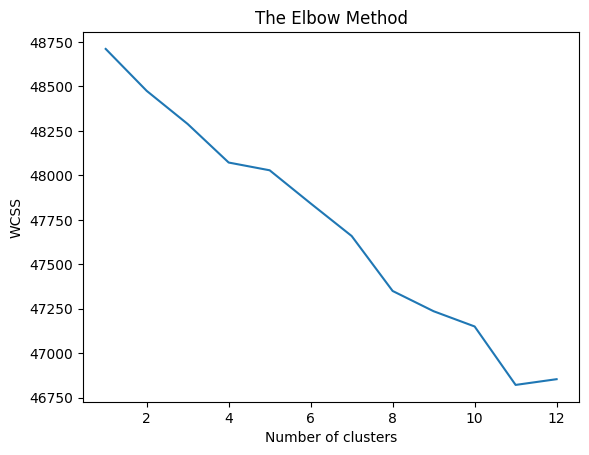

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

k = 4

In [36]:
kmeans = KMeans(n_clusters = 4, n_init = 20) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# Look at 4 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : win, award, titl, stage, tour, open, cup, world, lead, battl, score, gold, grand, m, record, final, claim, second, hope, contract, celebr, championship, race, aussi, way
1 : govt, vic, urg, nsw, fed, wa, sa, qld, fund, plan, local, consid, tas, claim, reject, accus, nt, new, say, act, support, feder, offer, defend, deni
2 : polic, plan, new, council, iraq, say, claim, face, warn, report, fund, court, urg, charg, set, world, war, open, water, cup, concern, boost, lead, continu, death
3 : man, kill, charg, polic, court, attack, crash, face, murder, soldier, jail, car, injur, blast, accid, die, miss, stab, bomb, rebel, assault, arrest, isra, iraq, search


k = 7

In [37]:
kmeans = KMeans(n_clusters = 7, n_init = 20)
kmeans.fit(X3)
# Look at 7 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : face, court, charg, man, hear, murder, high, trial, drug, rule, told, appear, appeal, woman, sex, alleg, futur, case, accus, tough, death, water, order, ban, sentenc
1 : report, world, cup, championship, australia, win, davi, rugbi, fed, final, highlight, team, aussi, set, sar, bid, death, titl, england, new, claim, best, open, releas, case
2 : new, govt, win, man, council, say, claim, kill, warn, charg, set, open, lead, concern, nsw, hope, crash, consid, qld, continu, water, war, group, boost, meet
3 : urg, iraqi, return, govt, public, troop, council, home, kill, farmer, soldier, minist, help, say, nsw, leader, baghdad, war, consid, pm, forc, vic, work, driver, saddam
4 : polic, probe, investig, man, arrest, search, miss, murder, death, car, hunt, fatal, seek, drug, help, charg, crash, bodi, victim, suspect, road, station, shoot, attack, stab
5 : iraq, fund, war, say, govt, soldier, boost, troop, bush, attack, kill, council, blair, help, seek, report, feder, road, health, resolut,

k = 8

In [39]:
kmeans = KMeans(n_clusters = 8, n_init = 20)
kmeans.fit(X3)
# Look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : win, council, iraq, claim, report, fund, face, set, world, court, urg, cup, open, war, lead, concern, boost, final, continu, water, hope, australia, consid, meet, iraqi
1 : new, kill, soldier, zealand, crash, blast, attack, iraq, rebel, isra, injur, law, palestinian, bomb, baghdad, iraqi, kashmir, accid, bus, china, hope, report, car, presid, launch
2 : polic, probe, investig, man, arrest, search, miss, murder, death, car, hunt, fatal, seek, drug, help, bodi, crash, suspect, victim, attack, road, shoot, charg, station, raid
3 : govt, urg, vic, fed, nsw, wa, sa, qld, fund, local, consid, tas, claim, reject, accus, nt, plan, support, new, act, feder, offer, defend, deni, review
4 : plan, council, new, water, develop, boost, protest, welcom, reject, centr, group, sought, merger, park, consid, public, manag, meet, resid, indigen, support, govt, concern, chang, ahead
5 : say, iraq, govt, need, war, iraqi, polic, crean, group, pm, mp, troop, minist, health, council, nt, wont, korea, boss

k = 10

In [40]:
kmeans = KMeans(n_clusters = 10, n_init = 20)
kmeans.fit(X3)
# Look at 10 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : vic, govt, polic, urg, fund, bushfir, central, minist, western, defend, job, strike, opposit, drought, teacher, rain, worker, rail, farmer, water, support, parliament, opp, new, west
1 : govt, wa, fed, sa, nsw, qld, fund, local, plan, consid, tas, accus, claim, nt, reject, say, act, support, offer, review, help, feder, deni, criticis, warn
2 : face, court, charg, man, trial, murder, drug, tough, futur, sex, water, final, test, woman, restrict, fine, death, ban, alleg, rate, polic, pair, assault, wait, child
3 : new, zealand, law, plan, hope, launch, presid, servic, chief, open, govt, set, announc, home, deal, sign, appoint, sar, work, station, polic, hit, help, centr, case
4 : urg, govt, public, farmer, council, nsw, driver, help, fund, care, plan, resid, fed, region, boost, consid, polic, water, qld, health, mp, chang, iraq, support, minist
5 : win, award, titl, stage, tour, open, cup, world, lead, battl, score, gold, grand, m, record, final, claim, second, hope, celebr, champions

In [41]:
kmeans = KMeans(n_clusters = 11, n_init = 20)
kmeans.fit(X3)
# Look at 11 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : plan, kill, claim, warn, report, fund, world, set, urg, cup, boost, concern, court, iraqi, open, water, war, continu, crash, hope, final, australia, group, meet, protest
1 : council, plan, merger, seek, reject, fund, approv, land, develop, urg, meet, secur, new, water, rate, manag, support, rise, elect, concern, air, chang, claim, super, decis
2 : polic, probe, investig, man, arrest, search, miss, death, murder, car, hunt, fatal, seek, drug, help, bodi, crash, victim, suspect, road, station, attack, shoot, raid, charg
3 : man, charg, face, court, murder, jail, stab, assault, die, car, kill, drug, sex, trial, death, guilti, attack, hospit, child, woman, crash, accid, sydney, fraud, rape
4 : govt, vic, urg, fed, nsw, wa, sa, fund, qld, plan, local, tas, claim, accus, reject, act, support, nt, feder, offer, review, defend, deni, help, region
5 : win, award, titl, stage, tour, open, cup, world, lead, battl, score, gold, grand, m, record, final, claim, second, hope, celebr, championship